In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df=pd.read_csv("D:/NAM 3/Ki II/Đồ án II/code crawl/tuyensinh10TpHue_cleaned.csv", encoding='utf-8')

Tổng quan

In [56]:
df.describe()

,sbd,diem_toan,diem_ngu_van/tieng_viet,diem_ngoai_ngu,diem_thcs,tong_xet_pho_thong/ntp
count,10955.000000,10748.000000,10750.000000,10749.000000,10955.000000,10747.000000
mean,88400.322045,3.295078,5.517952,4.790250,7.629279,21.395937
std,88812.120443,2.261032,1.746880,2.320362,2.376750,7.411347
min,10001.000000,0.000000,0.250000,0.600000,0.000000,4.950000
25%,12825.500000,1.500000,4.250000,3.000000,6.000000,15.600000
50%,40169.000000,2.750000,5.600000,4.000000,8.000000,20.700000
75%,160165.500000,4.750000,6.750000,6.400000,10.000000,27.200000
max,310206.000000,10.000000,9.750000,10.000000,10.000000,38.800000


Mode

In [57]:
print(df['diem_toan'].mode())
print(df['diem_ngu_van/tieng_viet'].mode())
print(df['diem_ngoai_ngu'].mode())

0    1.5
Name: diem_toan, dtype: float64
0    6.0
Name: diem_ngu_van/tieng_viet, dtype: float64
0    3.0
Name: diem_ngoai_ngu, dtype: float64


Số thí sinh điểm thấp hơn 1

In [58]:
(df['diem_toan']<=1).sum()
(df['diem_ngu_van/tieng_viet']<=1).sum()
(df['diem_ngoai_ngu']<=1).sum()

np.int64(10)

Số thí sinh đạt 10 điểm

In [59]:
print((df['diem_toan']==10).sum())
print((df['diem_ngu_van/tieng_viet']==10).sum())
print((df['diem_ngoai_ngu']==10).sum())

5
0
68


Text(0.5, 1.0, 'Phân phối tổng điểm xét tuyển Phổ thông/NTPT')

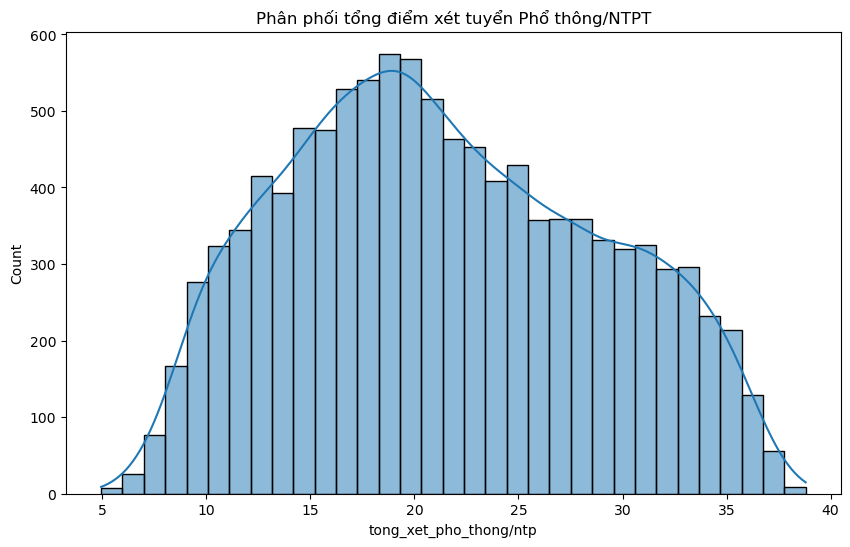

In [60]:
axs, fig = plt.subplots(figsize=(10, 6))
sns.histplot(df['tong_xet_pho_thong/ntp'], bins=33, kde=True)
plt.title('Phân phối tổng điểm xét tuyển Phổ thông/NTPT')       

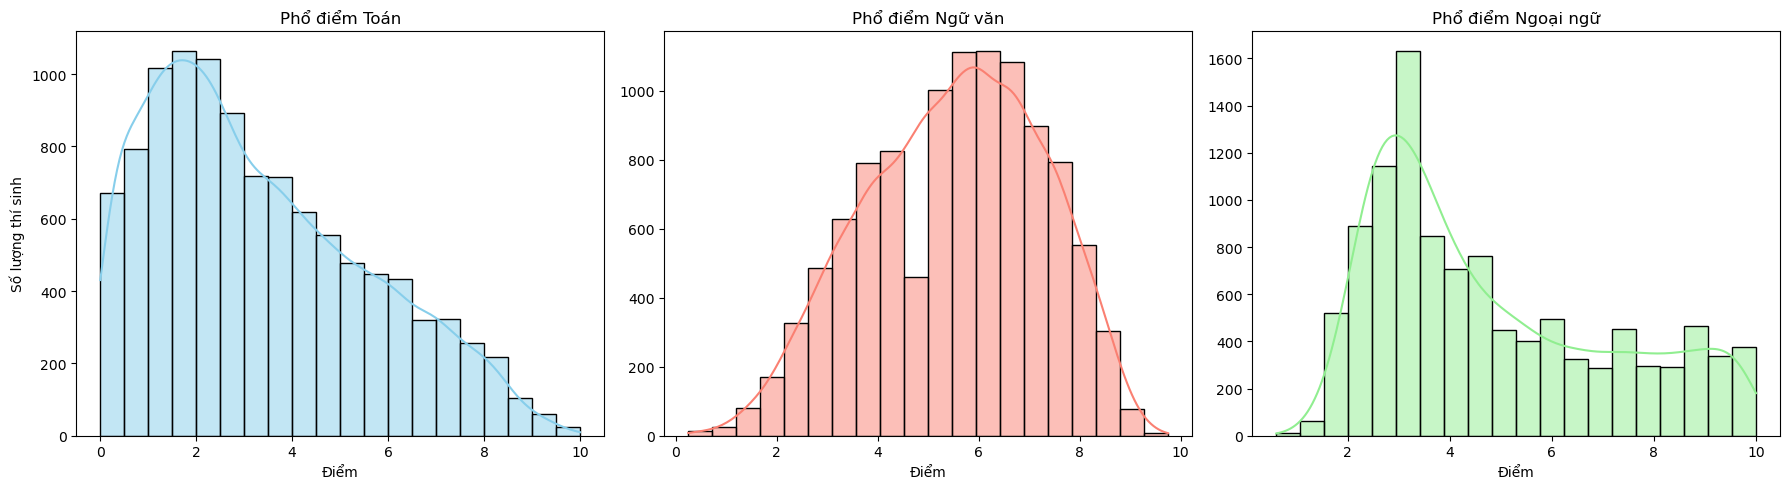

In [61]:

fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

# Biểu đồ điểm Toán
sns.histplot(df['diem_toan'].dropna(), bins=20, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Phổ điểm Toán')
ax[0].set_xlabel('Điểm')
ax[0].set_ylabel('Số lượng thí sinh')

# Biểu đồ điểm Văn
sns.histplot(df['diem_ngu_van/tieng_viet'].dropna(), bins=20, kde=True, color='salmon', ax=ax[1])
ax[1].set_title('Phổ điểm Ngữ văn')
ax[1].set_xlabel('Điểm')
ax[1].set_ylabel('')

# Biểu đồ điểm Ngoại ngữ
sns.histplot(df['diem_ngoai_ngu'].dropna(), bins=20, kde=True, color='lightgreen', ax=ax[2])
ax[2].set_title('Phổ điểm Ngoại ngữ')
ax[2].set_xlabel('Điểm')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()


Tỷ lệ giới tính

(np.float64(-1.0999997253215914),
 np.float64(1.0999977385634372),
 np.float64(-1.099999720119802),
 np.float64(1.0999980509762506))

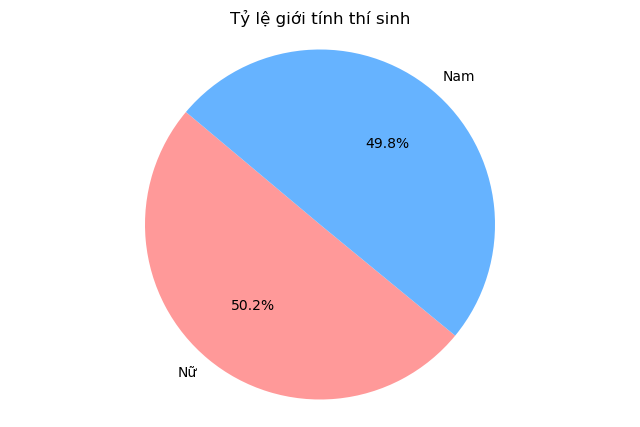

In [62]:
y=df['gioi_tinh'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(y, labels=y.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Tỷ lệ giới tính thí sinh')
plt.axis('equal')  # Đảm bảo hình tròn

So sánh điểm trung bình của nam và nữ các môn.

Điểm trung bình Toán của Nam: 3.26
Điểm trung bình Toán của Nữ: 3.33
Điểm trung bình Ngữ Văn của Nam: 5.13
Điểm trung bình Ngữ Văn của Nữ: 5.90
Điểm trung bình Ngoại Ngữ của Nam: 4.62
Điểm trung bình Ngoại Ngữ của Nữ: 4.95


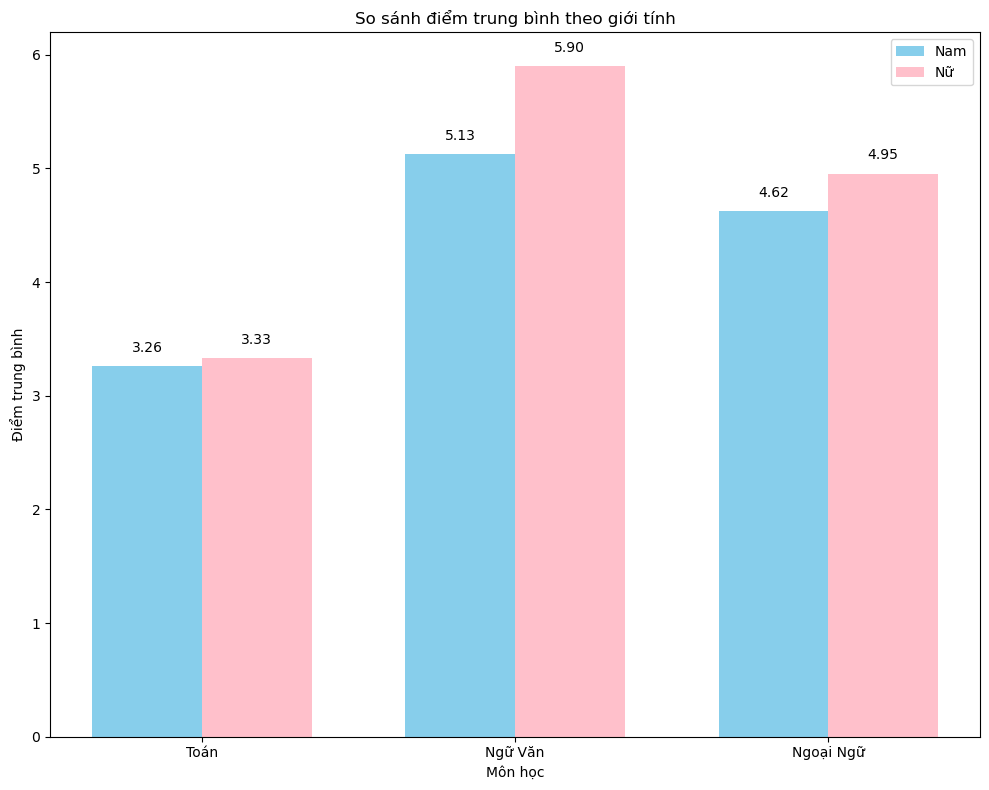

In [63]:

toan_nam_mean = df[df['gioi_tinh'] == 'Nam']['diem_toan'].mean()
toan_nu_mean = df[df['gioi_tinh'] == 'Nữ']['diem_toan'].mean()
van_nam_mean = df[df['gioi_tinh'] == 'Nam']['diem_ngu_van/tieng_viet'].mean()
van_nu_mean = df[df['gioi_tinh'] == 'Nữ']['diem_ngu_van/tieng_viet'].mean()
anh_nam_mean = df[df['gioi_tinh'] == 'Nam']['diem_ngoai_ngu'].mean()
anh_nu_mean = df[df['gioi_tinh'] == 'Nữ']['diem_ngoai_ngu'].mean()
print(f"Điểm trung bình Toán của Nam: {toan_nam_mean:.2f}")
print(f"Điểm trung bình Toán của Nữ: {toan_nu_mean:.2f}")
print(f"Điểm trung bình Ngữ Văn của Nam: {van_nam_mean:.2f}")
print(f"Điểm trung bình Ngữ Văn của Nữ: {van_nu_mean:.2f}")
print(f"Điểm trung bình Ngoại Ngữ của Nam: {anh_nam_mean:.2f}")
print(f"Điểm trung bình Ngoại Ngữ của Nữ: {anh_nu_mean:.2f}")

# Dữ liệu điểm trung bình
diem_gt = pd.DataFrame({
    'Môn': ['Toán', 'Ngữ Văn', 'Ngoại Ngữ'],
    'Nam': [toan_nam_mean, van_nam_mean, anh_nam_mean],
    'Nữ': [toan_nu_mean, van_nu_mean, anh_nu_mean]
})

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35
index = range(len(diem_gt))

# Cột cho Nam
bars_nam=ax.bar([i - bar_width/2 for i in index], diem_gt['Nam'], bar_width, label='Nam', color='skyblue')

# Cột cho Nữ
bars_nu=ax.bar([i + bar_width/2 for i in index], diem_gt['Nữ'], bar_width, label='Nữ', color='pink')

# Gán nhãn
ax.set_xlabel('Môn học')
ax.set_ylabel('Điểm trung bình')
ax.set_title('So sánh điểm trung bình theo giới tính')
ax.set_xticks(index)
ax.set_xticklabels(diem_gt['Môn'])
ax.legend()

for bar in bars_nam + bars_nu:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')   
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Điểm THCS ảnh hưởng đến tổng điểm xét toàn phần

In [64]:
# Kiểm tra mối tương quan giữa điểm THCS và tổng điểm xét tuyển
correlation = df[['diem_thcs', 'tong_xet_pho_thong/ntp']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa điểm THCS và tổng điểm xét tuyển: {correlation:.2f}")


Hệ số tương quan giữa điểm THCS và tổng điểm xét tuyển: 0.85


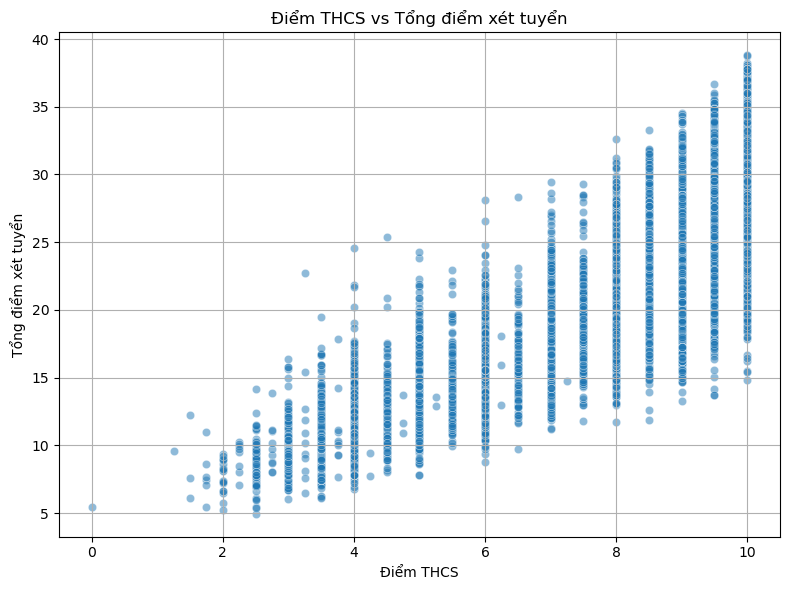

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='diem_thcs', y='tong_xet_pho_thong/ntp', alpha=0.5)
plt.title('Điểm THCS vs Tổng điểm xét tuyển')
plt.xlabel('Điểm THCS')
plt.ylabel('Tổng điểm xét tuyển')
plt.grid(True)
plt.tight_layout()
plt.show()


Các trường có số nguyện vọng 1 nhiều (không tính trường quốc học)

In [66]:
# số thí sinh đặt nguyện vọng 1 các trường
nv1=df['nguyen_vong_1'].value_counts()
nv2=df['nguyen_vong_2'].value_counts()
nv3=df['nguyen_vong_3'].value_counts()
nv=pd.concat([nv1, nv2, nv3], axis=1)
nv

,count,count,count
THPT Hai Bà Trưng,1031,14.0,49.0
THPT Nguyễn Huệ,841,286.0,29.0
THPT Cao Thắng,613,573.0,524.0
THPT Phan Đăng Lưu,594,352.0,249.0
THPT Gia Hội,580,611.0,534.0
THPT An Lương Đông,502,73.0,95.0
THPT Thừa Lưu,470,59.0,95.0
THPT Nguyễn Chí Thanh,414,82.0,19.0
THPT Đặng Huy Trứ,410,367.0,173.0
THPT Phú Bài,403,272.0,68.0


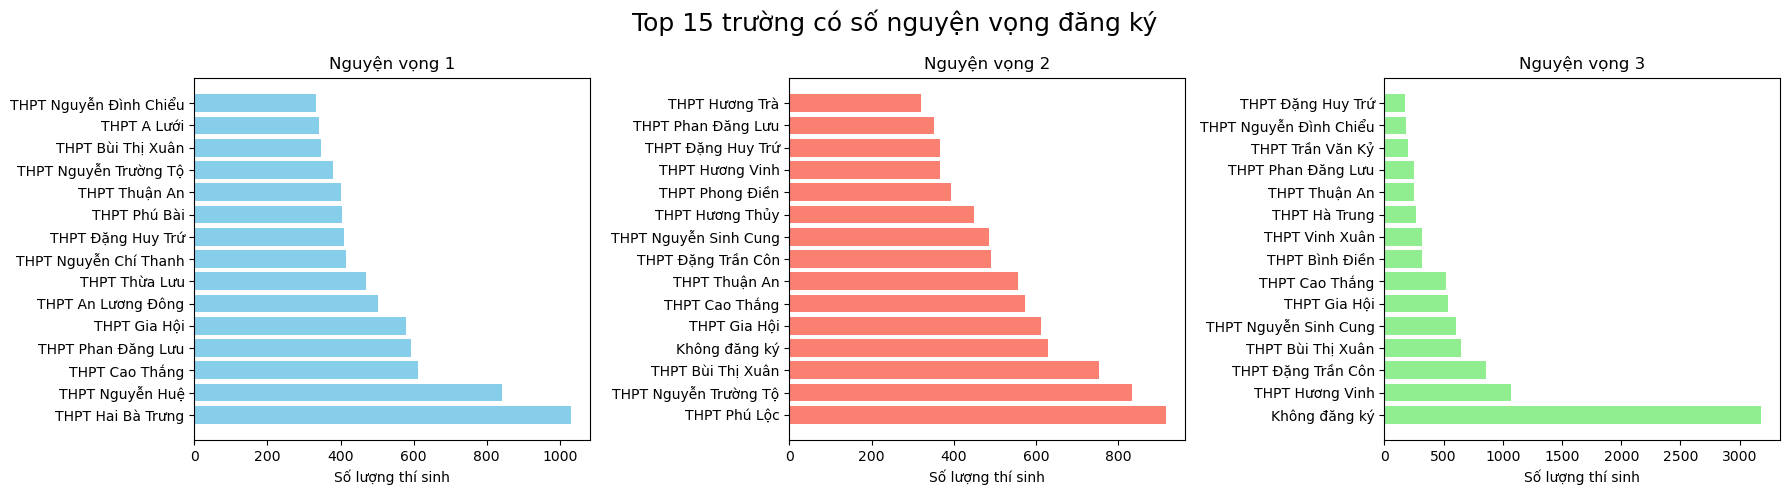

In [67]:
nv1=df['nguyen_vong_1'].value_counts().head(15)
nv2=df['nguyen_vong_2'].value_counts().head(15)
nv3=df['nguyen_vong_3'].value_counts().head(15)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

ax[0].barh(nv1.index, nv1.values, color='skyblue', label='Nguyện vọng 1')
ax[0].set_xlabel('Số lượng thí sinh')
ax[0].set_title('Nguyện vọng 1')

ax[1].barh(nv2.index, nv2.values, color='salmon', label='Nguyện vọng 2')
ax[1].set_xlabel('Số lượng thí sinh')
ax[1].set_title('Nguyện vọng 2')
ax[2].barh(nv3.index, nv3.values, color='lightgreen', label='Nguyện vọng 3')
ax[2].set_xlabel('Số lượng thí sinh')       
ax[2].set_title('Nguyện vọng 3')

plt.suptitle('Top 15 trường có số nguyện vọng đăng ký', fontsize=18)
plt.tight_layout()

Vị trí địa lý

In [68]:
quan_huyen=df['quan/huyen/tx'].value_counts()
quan_huyen


quan/huyen/tx
Quận Thuận Hóa       2906
Quận Phú Xuân        1807
Huyện Phú Lộc        1513
Huyện Phú Vang       1115
Thị xã Phong Điền    1027
Huyện Quảng Điền      718
Thị xã Hương Thủy     693
Thị xã Hương Trà      632
Huyện A Lưới          474
Ngoài tỉnh             69
Name: count, dtype: int64

Text(0, 0.5, 'Số lượng thí sinh')

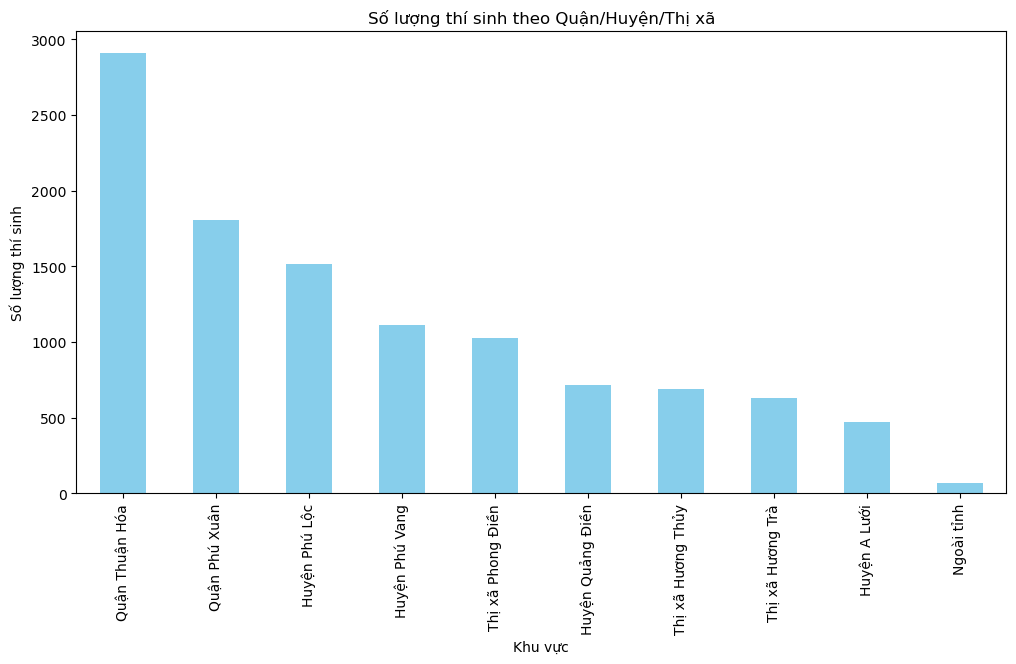

In [69]:
quan_huyen.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Số lượng thí sinh theo Quận/Huyện/Thị xã')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng thí sinh')



In [70]:
quan_huyen_tongxet_mean= df.groupby('quan/huyen/tx')['tong_xet_pho_thong/ntp'].mean().sort_values(ascending=False)
quan_huyen_tongxet_mean


quan/huyen/tx
Ngoài tỉnh           33.811324
Quận Thuận Hóa       24.392143
Quận Phú Xuân        22.613420
Thị xã Hương Thủy    21.007489
Thị xã Hương Trà     20.680987
Huyện Phú Vang       19.742663
Huyện Phú Lộc        19.301660
Huyện Quảng Điền     19.248837
Thị xã Phong Điền    19.159236
Huyện A Lưới         16.738056
Name: tong_xet_pho_thong/ntp, dtype: float64

Text(0.5, 0.98, 'Điểm trung bình theo khu vực')

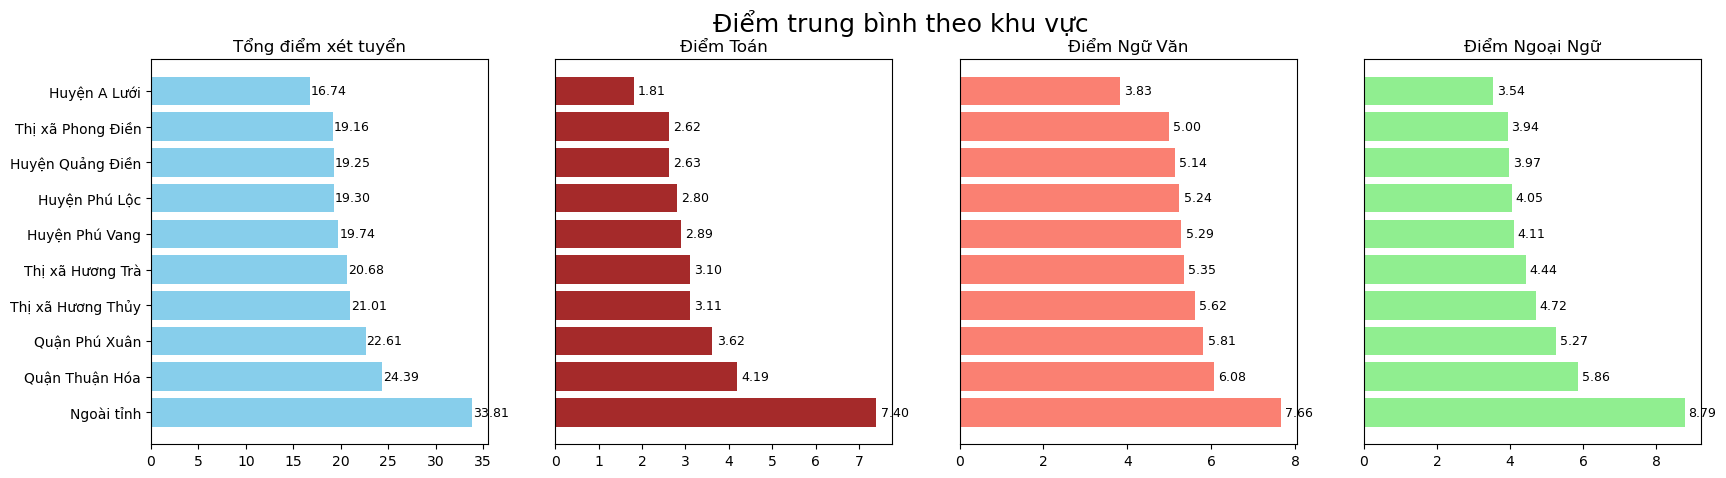

In [71]:
quan_huyen_toan_mean = df.groupby('quan/huyen/tx')['diem_toan'].mean().sort_values(ascending=False)
quan_huyen_van_mean = df.groupby('quan/huyen/tx')['diem_ngu_van/tieng_viet'].mean().sort_values(ascending=False)
quan_huyen_anh_mean = df.groupby('quan/huyen/tx')['diem_ngoai_ngu'].mean().sort_values(ascending=False)
quan_huyen_mean = pd.DataFrame({
    'Tổng điểm xét tuyển': quan_huyen_tongxet_mean,
    'Điểm Toán': quan_huyen_toan_mean,
    'Điểm Ngữ Văn': quan_huyen_van_mean,
    'Điểm Ngoại Ngữ': quan_huyen_anh_mean
})

def add_labels(ax):
    for bar in ax.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width + 0.1, y, f"{width:.2f}", va='center', fontsize=9)

quan_huyen_mean = quan_huyen_mean.reset_index()
fig,ax= plt.subplots(1,4, figsize=(20, 5))  

ax[0].barh(quan_huyen_tongxet_mean.index, quan_huyen_tongxet_mean.values, color='skyblue')
add_labels(ax[0])
ax[0].set_title('Tổng điểm xét tuyển')

ax[1].barh(quan_huyen_toan_mean.index, quan_huyen_toan_mean.values, color='brown')
ax[1].set_yticks([])
add_labels(ax[1])
ax[1].set_title('Điểm Toán')

ax[2].barh(quan_huyen_van_mean.index, quan_huyen_van_mean.values, color='salmon')
add_labels(ax[2])
ax[2].set_title('Điểm Ngữ Văn')
ax[2].set_yticks([])

ax[3].barh(quan_huyen_anh_mean.index, quan_huyen_anh_mean.values, color='lightgreen')
add_labels(ax[3])
ax[3].set_title('Điểm Ngoại Ngữ')
ax[3].set_yticks([])

plt.suptitle('Điểm trung bình theo khu vực', fontsize=18)


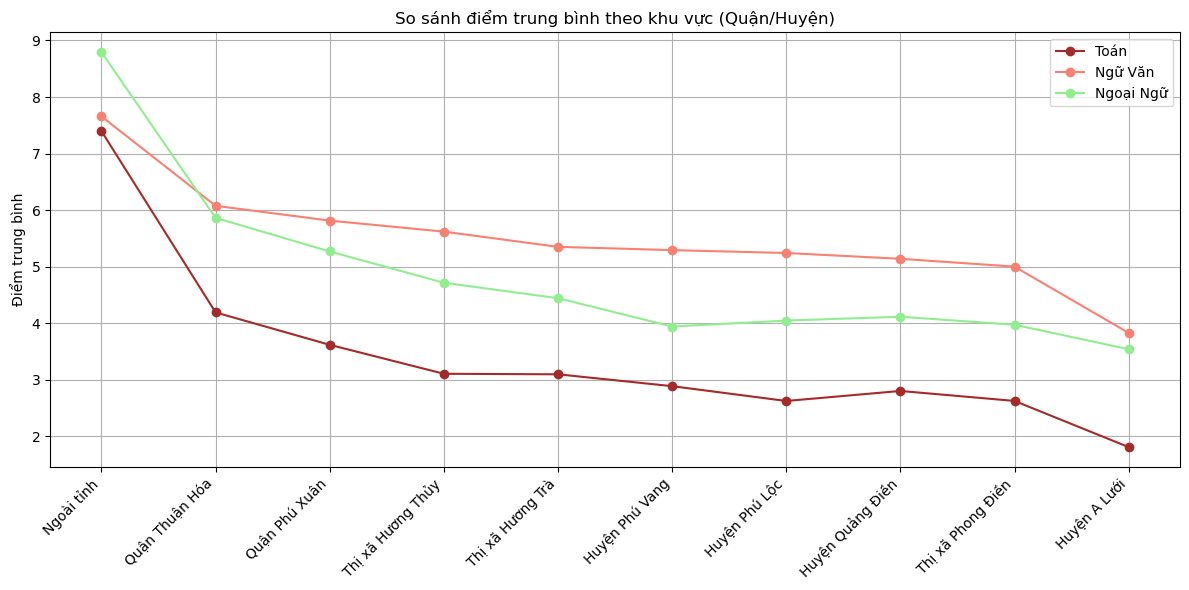

In [ ]:
import matplotlib.pyplot as plt

# Đảm bảo thứ tự khu vực giống nhau
quan_huyen_mean_sorted = quan_huyen_mean.sort_values('Tổng điểm xét tuyển', ascending=False)

plt.figure(figsize=(12, 6))

# plt.plot(quan_huyen_mean_sorted['quan/huyen/tx'], quan_huyen_mean_sorted['Tổng điểm xét tuyển'], 
#          marker='o', label='Tổng điểm xét tuyển', color='skyblue')
plt.plot(quan_huyen_mean_sorted['quan/huyen/tx'], quan_huyen_mean_sorted['Điểm Toán'], 
         marker='o', label='Toán', color='brown')
plt.plot(quan_huyen_mean_sorted['quan/huyen/tx'], quan_huyen_mean_sorted['Điểm Ngữ Văn'], 
         marker='o', label='Ngữ Văn', color='salmon')
plt.plot(quan_huyen_mean_sorted['quan/huyen/tx'], quan_huyen_mean_sorted['Điểm Ngoại Ngữ'], 
         marker='o', label='Ngoại Ngữ', color='lightgreen')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Điểm trung bình")
plt.title("So sánh điểm trung bình theo khu vực")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
quan_huyen_mean_sorted = quan_huyen_mean.sort_values('Tổng điểm xét tuyển', ascending=False)
quan_huyen_mean_sorted

,quan/huyen/tx,Tổng điểm xét tuyển,Điểm Toán,Điểm Ngữ Văn,Điểm Ngoại Ngữ
4,Ngoài tỉnh,33.811324,7.397059,7.656912,8.794118
6,Quận Thuận Hóa,24.392143,4.190635,6.075921,5.862785
5,Quận Phú Xuân,22.613420,3.617863,5.813957,5.268513
7,Thị xã Hương Thủy,21.007489,3.105839,5.619460,4.715036
8,Thị xã Hương Trà,20.680987,3.096184,5.350096,4.442607
2,Huyện Phú Vang,19.742663,2.886593,5.292388,3.940863
1,Huyện Phú Lộc,19.301660,2.624665,5.241492,4.046452
3,Huyện Quảng Điền,19.248837,2.801773,5.139121,4.114326
9,Thị xã Phong Điền,19.159236,2.625628,5.000291,3.972691
0,Huyện A Lưới,16.738056,1.808855,3.829309,3.539957


In [73]:
df['ngay_sinh'] = pd.to_datetime(df['ngay_sinh'], dayfirst=True, errors='coerce')



In [74]:
df['thang_sinh'] = df['ngay_sinh'].dt.month
df['nam_sinh'] = df['ngay_sinh'].dt.year

print(df['thang_sinh'].value_counts().sort_index())
df['nam_sinh'].value_counts().sort_index()

thang_sinh
1     1237
2      912
3      823
4      812
5      909
6      917
7      944
8      905
9      880
10    1010
11     931
12     675
Name: count, dtype: int64


nam_sinh
2005        1
2007        8
2008       23
2009      308
2010    10614
2011        1
Name: count, dtype: int64

In [75]:
# Lọc các học sinh sinh năm 2010, sau đó groupby theo tháng sinh
diem_tong_xet_mean_month = df[df['nam_sinh'] == 2010].groupby('thang_sinh')['tong_xet_pho_thong/ntp'].mean()
diem_tong_xet_mean_month

thang_sinh
1     22.991029
2     22.385518
3     22.172369
4     21.870243
5     21.571228
6     21.644205
7     21.699427
8     21.337204
9     20.989892
10    20.625122
11    20.268991
12    20.519307
Name: tong_xet_pho_thong/ntp, dtype: float64

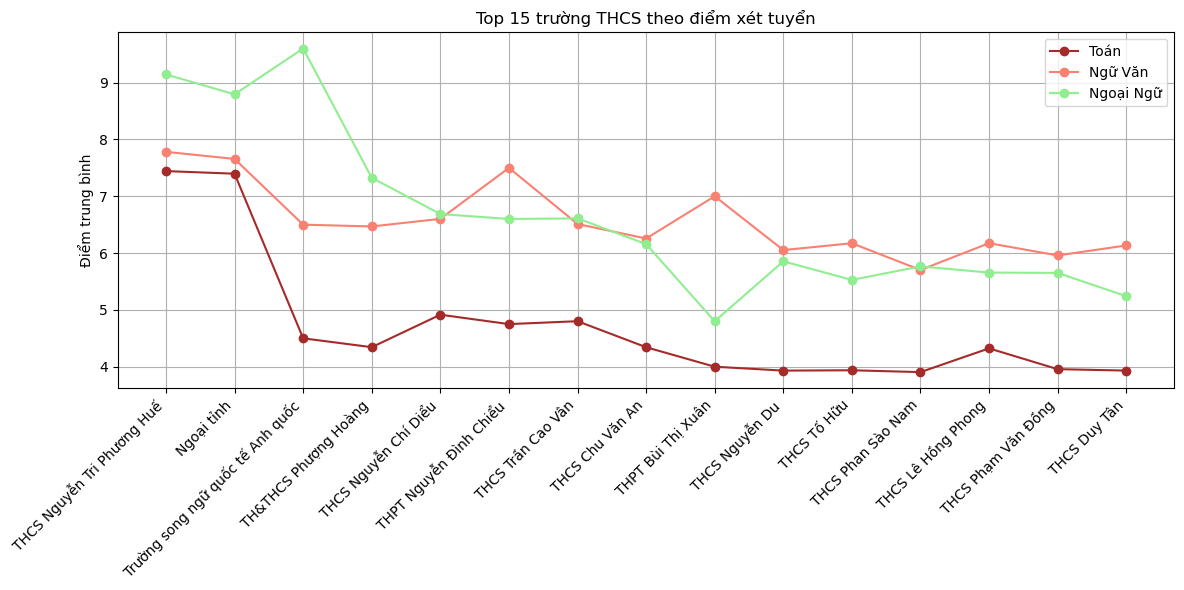

In [92]:
# Tính điểm trung bình theo trường THCS
thcs_toan_mean = df.groupby('truong_th/thcs')['diem_toan'].mean()
thcs_van_mean = df.groupby('truong_th/thcs')['diem_ngu_van/tieng_viet'].mean()
thcs_anh_mean = df.groupby('truong_th/thcs')['diem_ngoai_ngu'].mean()
thcs_tongxet_mean = df.groupby('truong_th/thcs')['tong_xet_pho_thong/ntp'].mean()

# Gộp lại thành 1 DataFrame
thcs_mean = pd.DataFrame({
    'Tổng điểm xét tuyển': thcs_tongxet_mean,
    'Điểm Toán': thcs_toan_mean,
    'Điểm Ngữ Văn': thcs_van_mean,
    'Điểm Ngoại Ngữ': thcs_anh_mean
})

# Lấy top 15 trường theo tổng điểm xét tuyển
top15_thcs = thcs_mean.sort_values('Tổng điểm xét tuyển', ascending=False).head(15)

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(top15_thcs.index, top15_thcs['Điểm Toán'], marker='o', label='Toán', color='brown')
plt.plot(top15_thcs.index, top15_thcs['Điểm Ngữ Văn'], marker='o', label='Ngữ Văn', color='salmon')
plt.plot(top15_thcs.index, top15_thcs['Điểm Ngoại Ngữ'], marker='o', label='Ngoại Ngữ', color='lightgreen')
# plt.plot(top15_thcs.index, top15_thcs['Tổng điểm xét tuyển'], marker='o', label='Tổng điểm', color='skyblue')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Điểm trung bình")
plt.title("Top 15 trường THCS theo điểm xét tuyển")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
